In [1]:
import pandas as pd
file_path = r'D:\Old\vscodess\Python\EDA\globalterrorismdb_0718dist.csv'
dtype_dict = {
    4: 'str',
    6: 'str',
    31: 'str',
    33: 'str',
    61: 'str',
    62: 'str',
    63: 'str',
    76: 'str',
    79: 'str',
    90: 'str',
    92: 'str',
    94: 'str',
    96: 'str',
    114: 'str',
    115: 'str',
    121: 'str'
}
df = pd.read_csv(file_path, encoding='ISO-8859-1',dtype=dtype_dict)
df

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [2]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [3]:
df.rename(columns={'country_txt':'Country','city':'City','nkill':'Killed','nwound':'Wounded'},inplace=True)
df=df[['Country','City','Killed','Wounded','attacktype1','attacktype2','attacktype3']]

In [4]:
df.isnull().sum()

Country             0
City              434
Killed          10313
Wounded         16311
attacktype1         0
attacktype2    175377
attacktype3    181263
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Country      181691 non-null  object 
 1   City         181257 non-null  object 
 2   Killed       171378 non-null  float64
 3   Wounded      165380 non-null  float64
 4   attacktype1  181691 non-null  int64  
 5   attacktype2  6314 non-null    float64
 6   attacktype3  428 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.7+ MB


In [6]:
df = df.copy()
df['Casualties'] = df['Killed'] + df['Wounded']
df['Attack'] = df['attacktype1'].astype(str) + ', ' + df['attacktype2'].astype(str) + ', ' + df['attacktype3'].astype(str)
casualty_count = df.groupby('Country')['Casualties'].sum().reset_index()

In [7]:
print("Country that faced the most attacks:",df['Country'].value_counts().idxmax())
print("Country with the most severe loss:",casualty_count.iloc[0]['Country'])

Country that faced the most attacks: Iraq
Country with the most severe loss: Afghanistan


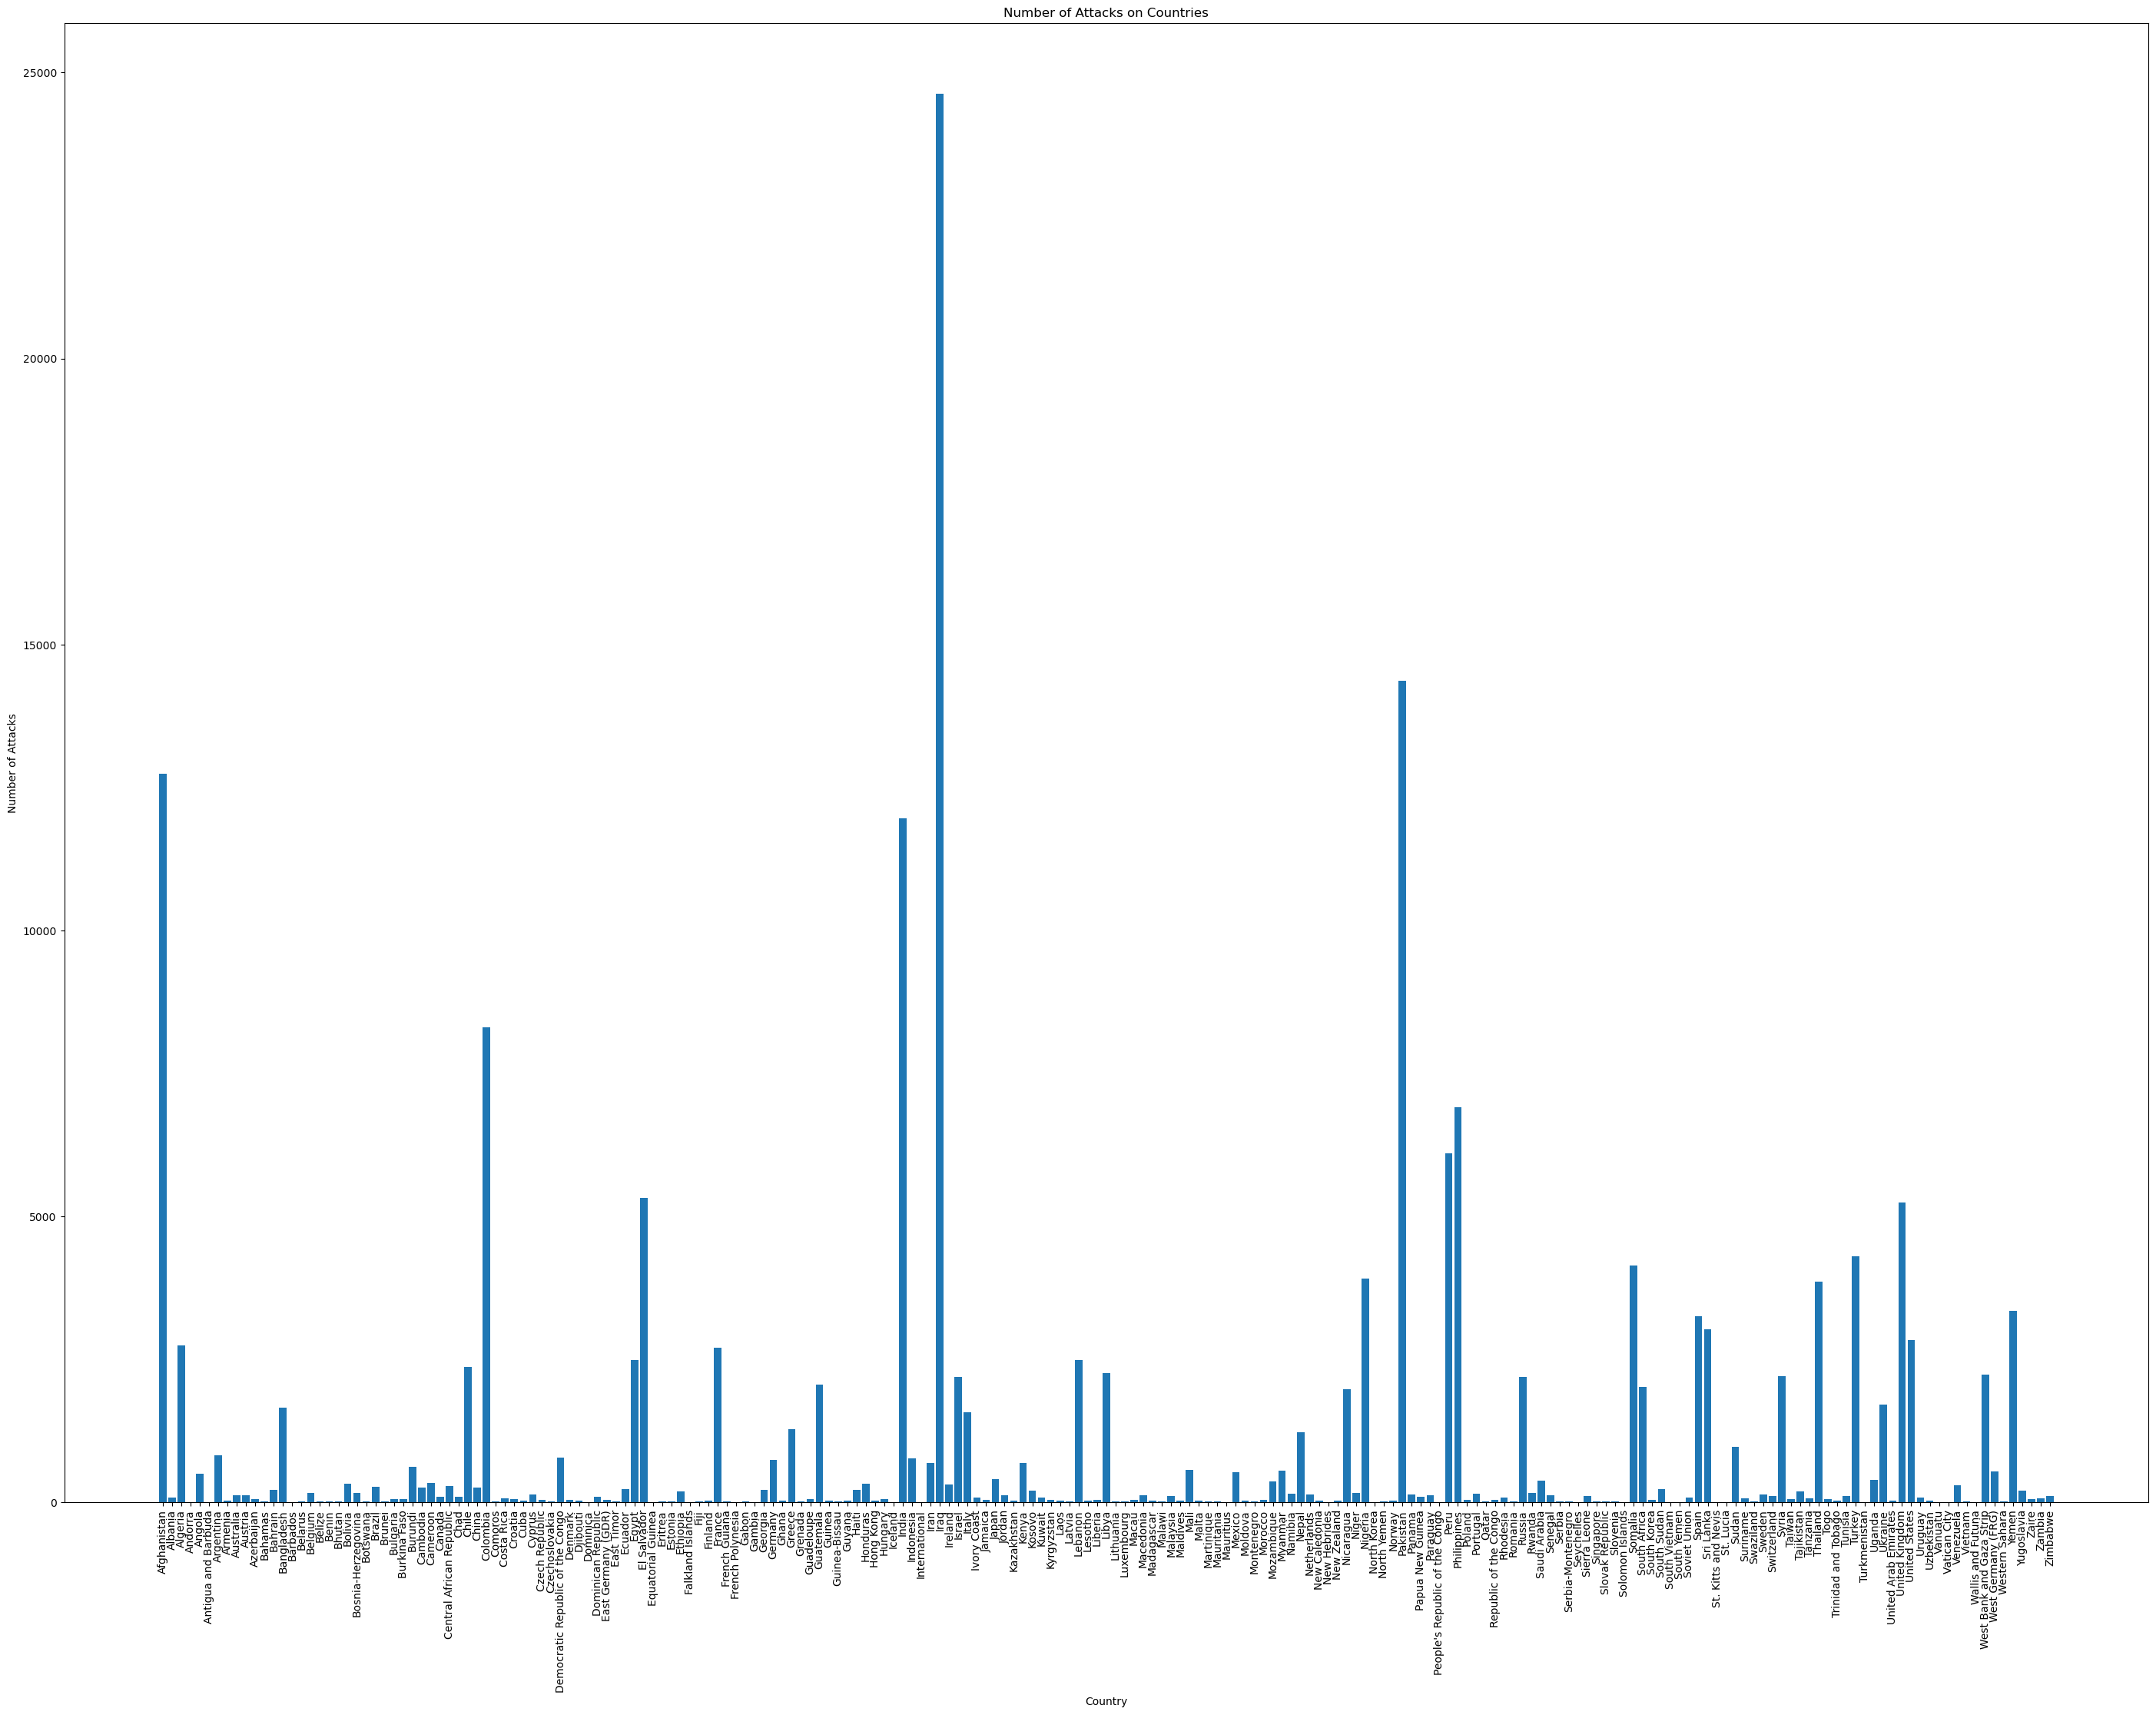

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(35,25))
attacks_country = df.groupby('Country')['Attack'].count().reset_index()
plt.bar(attacks_country['Country'], attacks_country['Attack'])
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Number of Attacks on Countries')
plt.xticks(rotation=90)
plt.show()

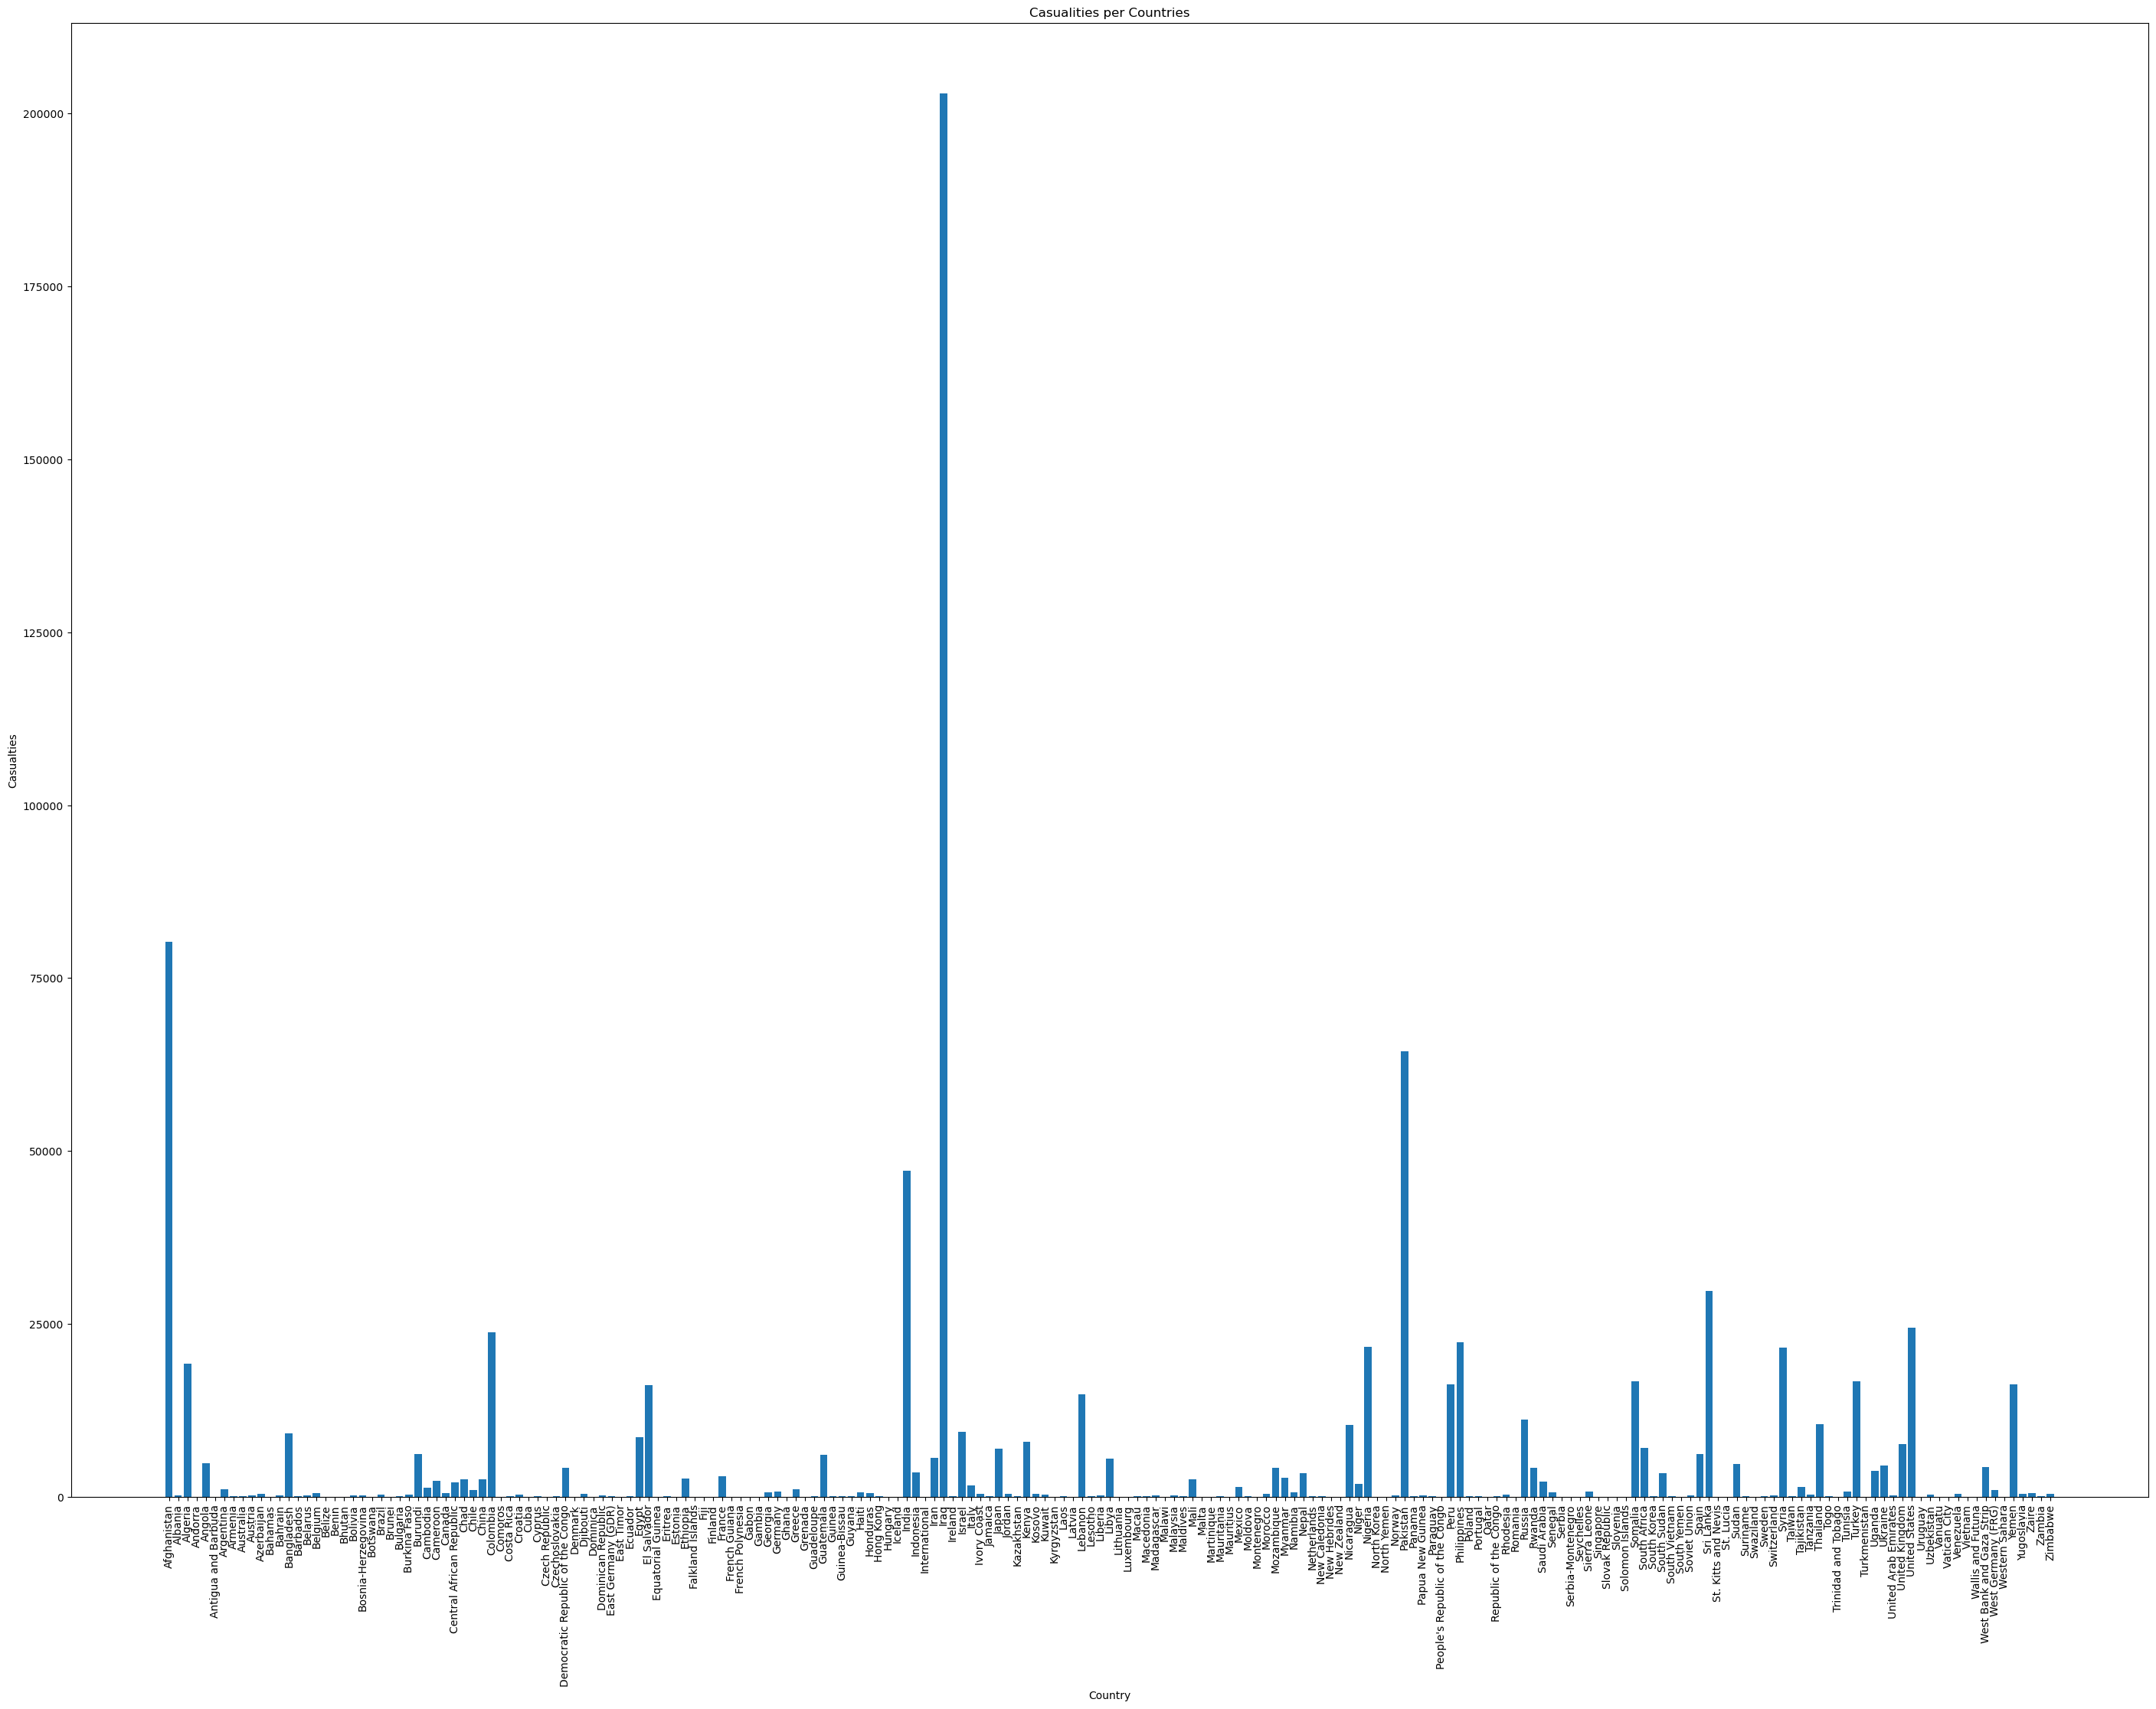

In [9]:
plt.figure(figsize=(35,25))
plt.bar(casualty_count['Country'], casualty_count['Casualties'])
plt.xlabel('Country')
plt.ylabel('Casualties')
plt.title('Casualities per Countries')
plt.xticks(rotation=90)
plt.show()